In [48]:
#importing libraries


import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [49]:
# we don't need to do any preprocoseeing except encoding as we know theere is no NULL values and data is cleaned.



In [50]:
# Loading our datasets


customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')
products = pd.read_csv('Products.csv')

In [51]:
# Aggregate transaction data so that we can calculating customers spending power and pattern


transaction_summary = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'TransactionID': 'count',
    'Price': 'mean'
}).rename(columns={'TransactionID': 'NoOfTransactions', 'Price': 'AvgTransactionValue'}).reset_index()


In [52]:
# Merge our transaction result with customer data


customer_data = pd.merge(customers, transaction_summary, on='CustomerID', how='left')

In [53]:
# Encode REgion cause it is categorical value


customer_data = pd.get_dummies(customer_data, columns=['Region'], drop_first=True)
customer_data.fillna(0, inplace=True)

In [54]:
# scaling our featires for better result

# cust=customer_data.drop(columns=['CustomerID', 'CustomerName', 'SignupDate'],inplace=True)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data.drop(columns=['CustomerID', 'CustomerName', 'SignupDate']))

In [55]:
# kmeans clustering and no of clusters is determinded via elbow method

kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)
# customer_data['Cluster'] = kmeans.fit_predict(scaled_data)

C:\Users\Shalender\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [56]:
#avaluating the result of kmeans 


db_index = davies_bouldin_score(scaled_data, customer_data['Cluster'])
silhouette_avg = silhouette_score(scaled_data, customer_data['Cluster'])
print(f"Davies-Bouldin Index: {db_index}, Silhouette Score: {silhouette_avg}")

Davies-Bouldin Index: 1.2249965469608148, Silhouette Score: 0.33230070099758946


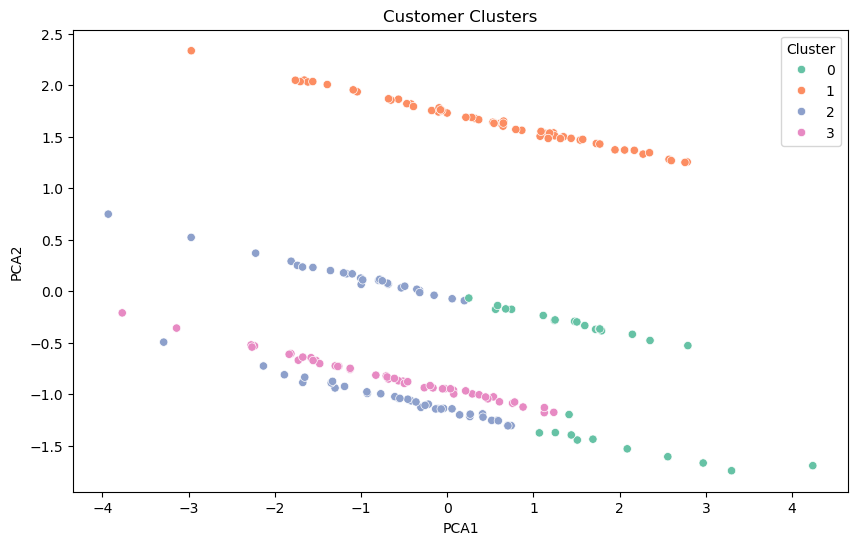

In [57]:
#plotting the graph for kmeans output pr clustering 

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
customer_data['PCA1'], customer_data['PCA2'] = pca_data[:, 0], pca_data[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=customer_data, palette='Set2')
plt.title('Customer Clusters')
plt.show()

C:\Users\Shalender\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Shalender\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Shalender\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Shalender\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memor

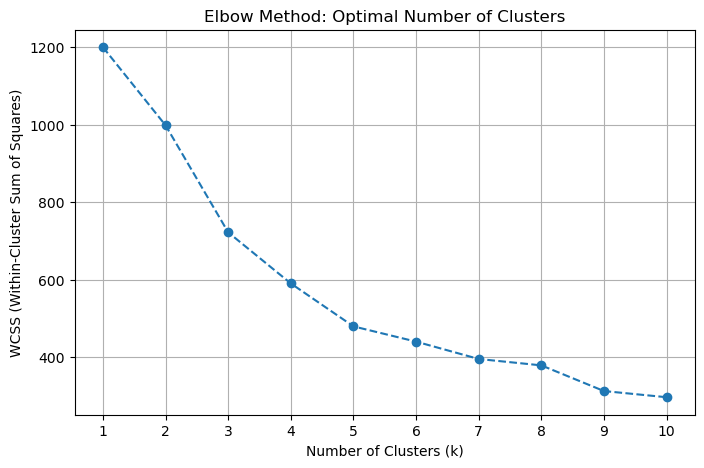

In [61]:
## elbow method for determining cluters 

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)  
    wcss.append(kmeans.inertia_)  

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method: Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()
